In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import display, clear_output

# Класс нейрон

In [178]:
class Neuron:
    def __init__(self, input_size: int, weights: np.ndarray = None):
        self._input_size = input_size
        if weights is not None:
            self._weights = weights
        else:
            np.random.seed(41)
            self._weights = np.random.random(size=(input_size, 1))

    def update(self,
               input_vector: np.ndarray,
               true_value: int,
               learning_rate: float = 0.01):
        predicted_value = self.predict(input_vector)
        if predicted_value is not true_value:
            for weight, x in zip(self._weights, input_vector):
                weight += learning_rate * x * (true_value - predicted_value)

    def fit(self,
            input_vectors: np.ndarray,
            true_values: np.ndarray,
            epoch: int = None,
            learning_rate: float = 0.01,
            verbose: bool = False):
        if verbose:
            weights = [self._weights.tolist()]

        fitted = False

        while not fitted or (epoch != None and epoch > 0):
            check = True

            for x, true_value in zip(input_vectors, true_values):
                if self.predict(x) != true_value:
                    self.update(x, true_value, learning_rate)
                    check = False

                    if verbose:
                        weights.append(self._weights.tolist())

            if check:
                fitted = True

            if epoch != None:
                epoch -= 1

        if verbose:
            return weights

    def predict(self, input_vector: np.ndarray):
        if (input_vector @ self._weights > 0):
            return 1
        else:
            return -1

# Example code

In [196]:
train_x, train_y = datasets.make_blobs(n_samples=1000,
                                       centers=2,
                                       n_features=2,
                                       random_state=11)
train_x = np.insert(train_x, 0, 1, axis=1)
train_y = np.array([1 if y == 0 else -1 for y in train_y])

train_x

array([[  1.        ,  -5.82624878,  -9.7352259 ],
       [  1.        ,  -4.0976215 ,   3.68795596],
       [  1.        ,  -6.46227479, -10.02370492],
       ...,
       [  1.        ,  -7.34126188, -10.41510579],
       [  1.        ,  -7.32648021,  -8.63074515],
       [  1.        ,  -6.21744404,  -9.10792584]])

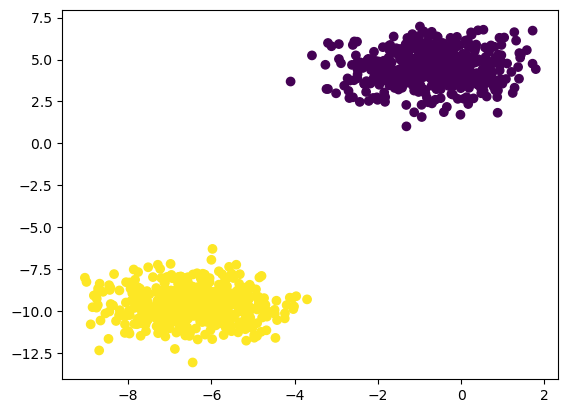

In [197]:
fig, ax = plt.subplots()
ax.scatter(train_x[:, 1], train_x[:, 2], c=train_y)
plt.show()

In [198]:
neuron = Neuron(3)

In [199]:
weights = neuron.fit(train_x, train_y, verbose=True)

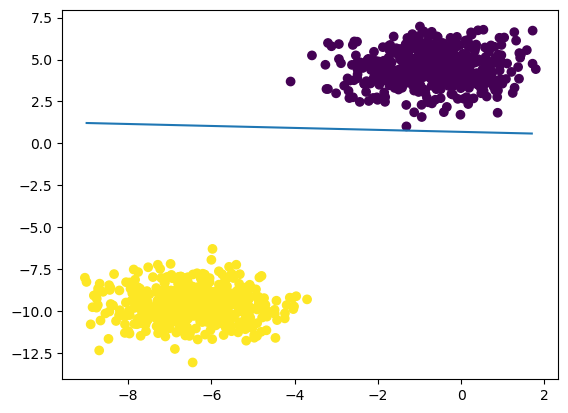

In [200]:
start = round(train_x[:, 1].min() * 10)
stop = round(train_x[:, 1].max() * 10)
x_scale = np.array([i / 10 for i in range(start, stop)])
y_scale = np.array([train_x[:, 2].min(), train_x[:, 2].max()])

fig, ax = plt.subplots()

for weight in weights:
    y = [[], []]
    for x in x_scale:
        tmp = (-1) * (weight[0][0] + weight[1][0] * x) / weight[2][0]
        if tmp > y_scale[0] and tmp < y_scale[1]:
            y[0].append(x)
            y[1].append(tmp)

    ax.cla()
    ax.scatter(train_x[:, 1], train_x[:, 2], c=train_y)
    ax.plot(y[0], y[1])

    display(fig)

    clear_output(wait=True)
    plt.pause(0.1)